#### Python for Finance: Get Stock Market Data

In this tutorial we begin by using pandas_datareader to import financial stock data.

In [1]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

#### Step 1: Specify date range for analysis
Here we begin by creating start and end dates using python's datetime module.

In [2]:
end = dt.datetime.now()
start = end - dt.timedelta(days=5000)
start, end

(datetime.datetime(2010, 8, 6, 21, 10, 53, 30085),
 datetime.datetime(2024, 4, 14, 21, 10, 53, 30085))

#### Step 2: Select the stocks/tickers you would like to analyse

For Australian stocks, yahoo tickers require '.AX' to be specified at the end of the ticker symbol.
For other tickers, use the search bar in yahoo finance to work out other ticker structures. 

In [3]:
stocklist = ['CBA', 'NAB', 'WBC', 'BHP']
stocks = [i + '.AX' for i in stocklist]
stocks

['CBA.AX', 'NAB.AX', 'WBC.AX', 'BHP.AX']

#### Step 3: call the pandas_datareader module:
Two ways of doing this:
1. pdr.DataReader(stocks, 'yahoo', start, end)
2. pdr.get_data_yahoo(stocks, start, end)

In [4]:
df = yf.download(stocks, start, end)
df.head()

[*********************100%%**********************]  4 of 4 completed


Price       Adj Close                                       Close             \
Ticker         BHP.AX     CBA.AX     NAB.AX     WBC.AX     BHP.AX     CBA.AX   
Date                                                                           
2010-08-06  15.058864  25.667734  10.459113  11.385051  34.221554  52.306602   
2010-08-09  15.212632  25.887363  10.467474  11.471809  34.571007  52.754177   
2010-08-10  14.912413  25.745821  10.237647  11.221169  33.888741  52.465740   
2010-08-11  14.637814  24.984428   9.982751  10.806638  33.264713  50.914146   
2010-08-12  14.513330  24.745274   9.920071  10.705418  32.981823  50.426788   

Price                                  High             ...        Low  \
Ticker         NAB.AX     WBC.AX     BHP.AX     CBA.AX  ...     NAB.AX   
Date                                                    ...              
2010-08-06  23.810600  23.460281  34.221554  52.505524  ...  23.601318   
2010-08-09  23.829626  23.639065  34.654209  52.903370  ...  23.610830   
2010-08-10  23.306421  23.122581  34.412922  53.191807  ...  23.268370   
2010-08-11  22.726139  22.268396  33.730656  51.630268  ...  22.697599   
2010-08-12  22.583447  22.059816  33.056705  50.635654  ...  22.279036   

Price                       Open                                     Volume  \
Ticker         WBC.AX     BHP.AX     CBA.AX     NAB.AX     WBC.AX    BHP.AX   
Date                                                                          
2010-08-06  23.301365  33.930344  52.406063  23.791574  23.490080  24855051   
2010-08-09  23.202040  34.071789  51.918705  23.782063  23.261635  29112571   
2010-08-10  23.033190  34.371319  52.982937  23.734497  23.559607  41495262   
2010-08-11  22.258465  33.605846  50.943985  23.144703  22.566368  28471576   
2010-08-12  21.841305  32.723892  50.227863  22.450268  21.930695  17803541   

Price                                     
Ticker        CBA.AX    NAB.AX    WBC.AX  
Date                                      
2010-08-06   3573853   3423054   5945230  
2010-08-09   2987318   3308848   7827729  
2010-08-10   4028236  10299929   9064362  
2010-08-11  15947699  14887260  20648556  
2010-08-12  11112837   7668063  10800476  

[5 rows x 24 columns]

#### Step 4: Understanding the pandas dataframe structure
A good way of understanding how a pandas dataframe is structured is to look at the index and the columns.

In [5]:
df.index

DatetimeIndex(['2010-08-06', '2010-08-09', '2010-08-10', '2010-08-11',
               '2010-08-12', '2010-08-13', '2010-08-16', '2010-08-17',
               '2010-08-18', '2010-08-19',
               ...
               '2024-03-28', '2024-04-02', '2024-04-03', '2024-04-04',
               '2024-04-05', '2024-04-08', '2024-04-09', '2024-04-10',
               '2024-04-11', '2024-04-12'],
              dtype='datetime64[ns]', name='Date', length=3460, freq=None)

In [6]:
df.columns

MultiIndex([('Adj Close', 'BHP.AX'),
            ('Adj Close', 'CBA.AX'),
            ('Adj Close', 'NAB.AX'),
            ('Adj Close', 'WBC.AX'),
            (    'Close', 'BHP.AX'),
            (    'Close', 'CBA.AX'),
            (    'Close', 'NAB.AX'),
            (    'Close', 'WBC.AX'),
            (     'High', 'BHP.AX'),
            (     'High', 'CBA.AX'),
            (     'High', 'NAB.AX'),
            (     'High', 'WBC.AX'),
            (      'Low', 'BHP.AX'),
            (      'Low', 'CBA.AX'),
            (      'Low', 'NAB.AX'),
            (      'Low', 'WBC.AX'),
            (     'Open', 'BHP.AX'),
            (     'Open', 'CBA.AX'),
            (     'Open', 'NAB.AX'),
            (     'Open', 'WBC.AX'),
            (   'Volume', 'BHP.AX'),
            (   'Volume', 'CBA.AX'),
            (   'Volume', 'NAB.AX'),
            (   'Volume', 'WBC.AX')],
           names=['Price', 'Ticker'])

#### Step 5: Access useful attributes easily
Lets assume we would like to use the close price information for all of these stocks. Then we will use this simply graph these price tracers.

In [7]:
Close = df.Close
Close.head()

Ticker,BHP.AX,CBA.AX,NAB.AX,WBC.AX
Date,,,,
2010-08-06,34.221554,52.306602,23.810600,23.460281
2010-08-09,34.571007,52.754177,23.829626,23.639065
2010-08-10,33.888741,52.465740,23.306421,23.122581
2010-08-11,33.264713,50.914146,22.726139,22.268396
2010-08-12,32.981823,50.426788,22.583447,22.059816


#### Step 6: Gain insights with pandas describe method

In [8]:
Close[Close.index > end - dt.timedelta(days=100)].describe(percentiles=[0.1, 0.5, 0.9])

Ticker,BHP.AX,CBA.AX,NAB.AX,WBC.AX
count,67.000000,67.000000,67.000000,67.000000
mean,45.284179,116.197612,33.144328,25.208209
std,1.598048,2.124661,1.325269,1.395919
min,41.950001,111.980003,30.510000,22.850000
10%,43.607999,113.471999,30.916000,23.196001
50%,45.169998,116.050003,33.610001,25.900000
90%,47.378001,118.675999,34.630001,26.670000
max,48.970001,121.449997,35.110001,27.700001


#### Step 7: Plotting with matplotlib vs plotly

<Axes: xlabel='Date'>

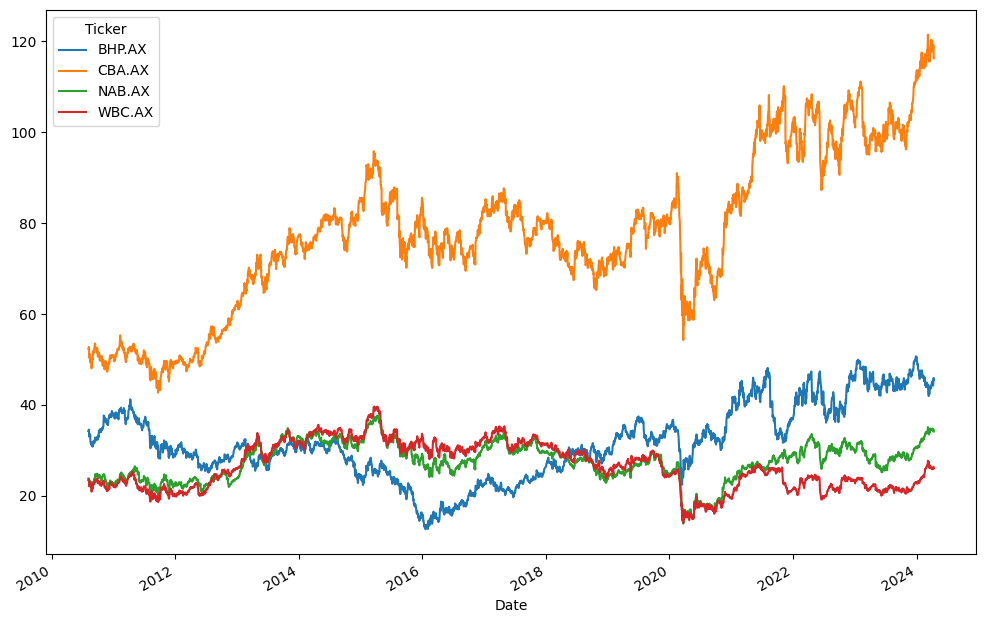

In [9]:
Close.plot(figsize=(12,8))

In [10]:
import plotly.express as px

In [11]:
Close

Ticker,BHP.AX,CBA.AX,NAB.AX,WBC.AX
Date,,,,
2010-08-06,34.221554,52.306602,23.810600,23.460281
2010-08-09,34.571007,52.754177,23.829626,23.639065
2010-08-10,33.888741,52.465740,23.306421,23.122581
2010-08-11,33.264713,50.914146,22.726139,22.268396
2010-08-12,32.981823,50.426788,22.583447,22.059816
...,...,...,...,...
2024-04-08,44.250000,118.190002,34.450001,26.090000
2024-04-09,45.130001,119.150002,34.630001,26.389999
2024-04-10,45.459999,118.209999,34.630001,26.389999


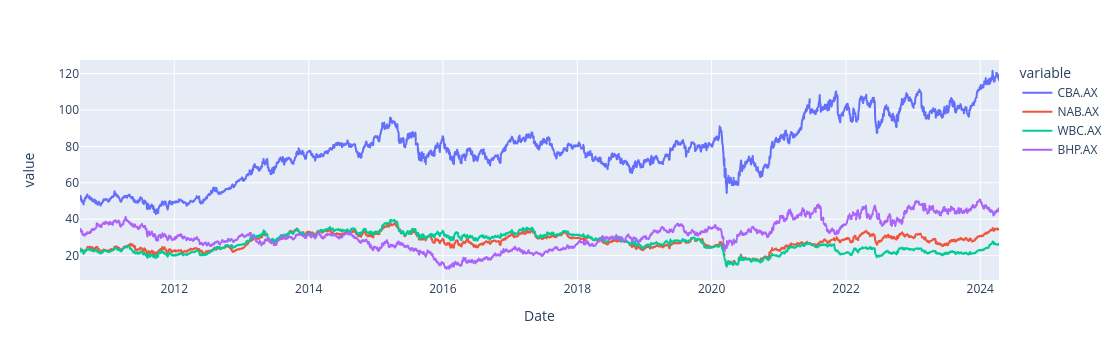

In [15]:
fig = px.line(Close.reset_index(), x='Date', y=stocks)
fig.show()

In [17]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

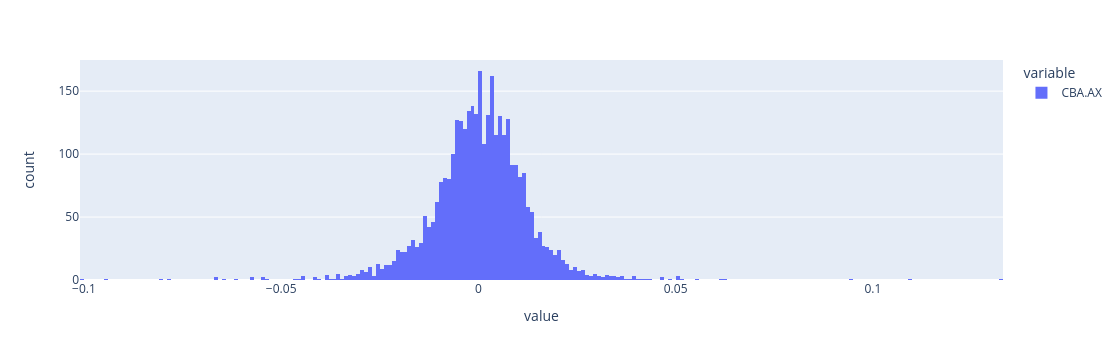

In [18]:
Close['CBA.AX'].pct_change().plot(kind='hist')

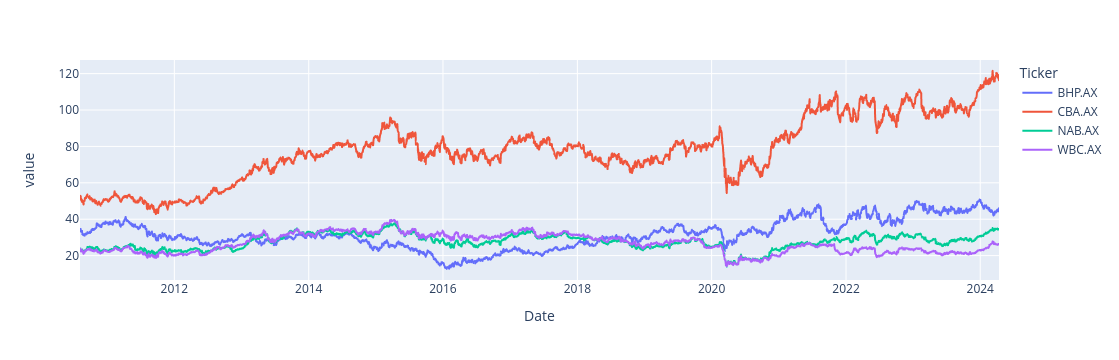

In [19]:
Close.plot()